In [29]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
from tqdm import tqdm 

# Punto 5

In [30]:
def System(r,t,q):
    x = r
    dxdt = x**q
    
    return dxdt

In [31]:
def solution(t, q): 
    return (t*(1-q)+1)**(1/(1-q))


def solution_q1(t, q): 
    return (np.e)**(t)


In [32]:
def Integrator2(f,r0,t,q):
    
    h = t[1] - t[0]
    print(h)
    
    x = np.zeros_like(t)
    
    x[0] = r0[0]

    
    K1 = np.zeros(1)
    K2 = np.zeros(1)
    
    # Las pendientes instantaneas
    R = np.zeros(1)

    for i in range(1,len(t)):
        
        R = np.array([x[i-1]])
        
        K1 = f(R,t[i-1],q)
        
        R = np.array([x[i-1]+h*K1[0]])
        
        K2 = f(R,t[i-1]+h,q)
        
        x[i] = x[i-1] + 0.5*h*(K1[0]+K2[0])

        
    return x

In [33]:
r0 = [1.]
h = 0.01
t = np.arange(0,10+h,h)


0.01


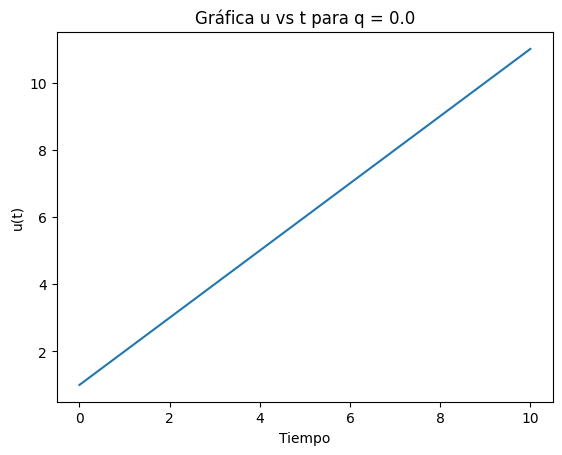

0.01


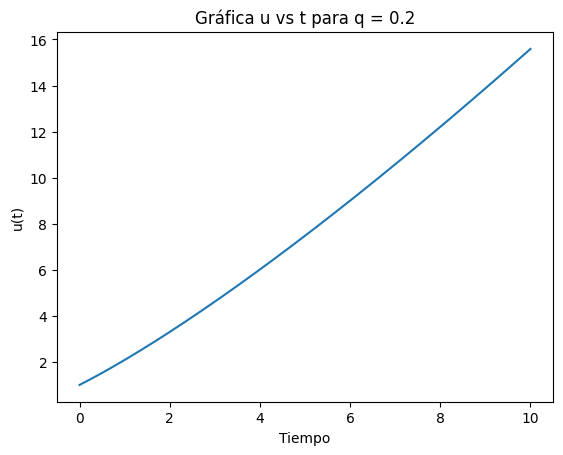

0.01


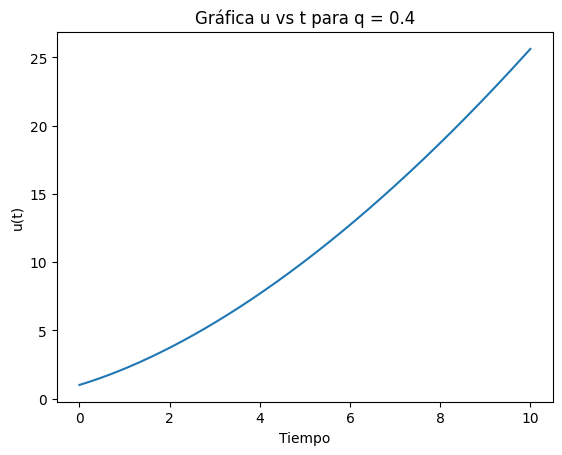

0.01


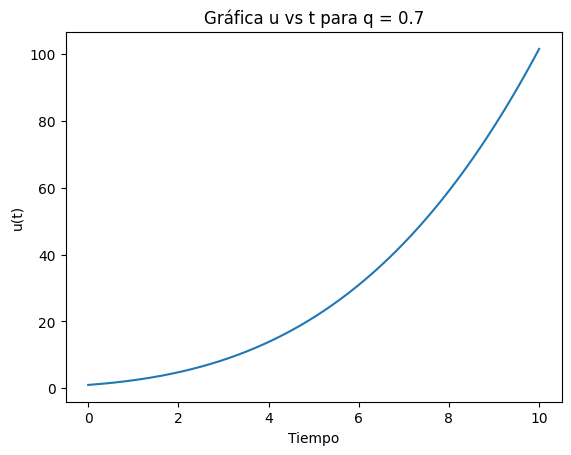

0.01


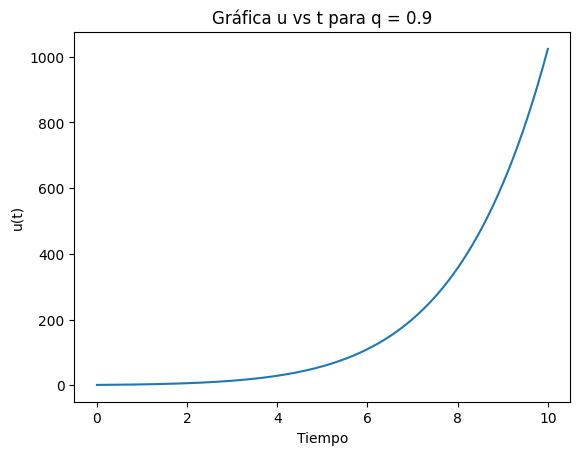

0.01


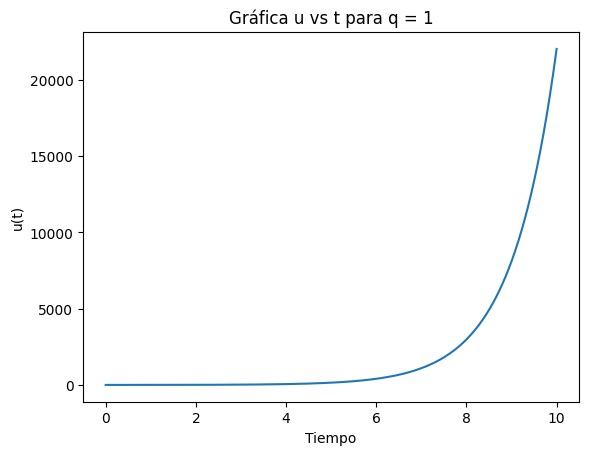

In [34]:
def plot(t,q): 
    x = Integrator2(System,r0,t,q)
    #El codigo comentado permite plotear la solución analitica
    """if q ==1: 
        real = solution_q1(t,q)
    else: 
        real = solution(t,q)
    plt.plot(t,real)"""
    plt.plot(t,x)
    plt.title("Gráfica u vs t para q = {}".format(q))
    plt.xlabel("Tiempo")
    plt.ylabel("u(t)")
   
    plt.show()

plot(t,0.)
plot(t,0.2)
plot(t,0.4)
plot(t,0.7)
plot(t,0.9)
plot(t,1)



# Punto 6

In [35]:
class Planeta:
    
    def __init__(self, e, a,alpha, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        self.alpha = alpha #Correccion
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1-self.e)/(self.a_*(1.+self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = ((-(self.G)/(d**3))*self.r)*(1+(self.alpha/d**2))
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt+(1/2)*self.a*self.dt**2
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = self.r + self.v*self.dt +(1/2)*self.a*self.dt**2

            self.vf = self.v +(1/2)*self.dt*(self.a+ self.a) # La aceleracion en este caso es independiente del tiempo! por eso es lo mismo 
            
    
            self.r = self.rf
            self.v = self.vf
    
    def SetPosition(self,i):
        #print(self.R[1000], "voy en el {}".format(i))
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        angle = []
        positionPerihelium=[]
        
        unitaryVector =np.zeros(3)
        unitaryVector[0]=-1
        
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                plt.scatter(self.R[i][0],self.R[i][0])
                timeup.append(self.t[i])
                positionPerihelium.append(self.R[i])

                                    
                        
            
        return timeup,positionPerihelium

In [36]:
dt = 0.00001
tmax =10
t = np.arange(0.,tmax,dt)
t = np.arange(0.,tmax,dt)

In [37]:
Mercurio = Planeta(0.2056,0.307,1.1*10**(-8), t)

In [38]:
def RunSimulation(t,Planeta):

    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):

        Planeta.Evolution(it)
            
            
    return Planeta

In [39]:
Planeta = RunSimulation(t,Mercurio)

Running simulation: 100%|██████████| 100000/100000 [00:01<00:00, 53070.68 Steps/s]


In [40]:
scale = 1
t1 = t[::scale]

21 21
[1.0000e-04 3.3700e-02 1.1410e-01 2.0940e-01 3.2130e-01 4.5200e-01
 6.0400e-01 7.8030e-01 9.8440e-01 1.2205e+00 1.4939e+00 1.8108e+00
 2.1792e+00 2.6088e+00 3.1124e+00 3.7064e+00 4.4126e+00 5.2606e+00
 6.2919e+00 7.5664e+00 9.1744e+00]


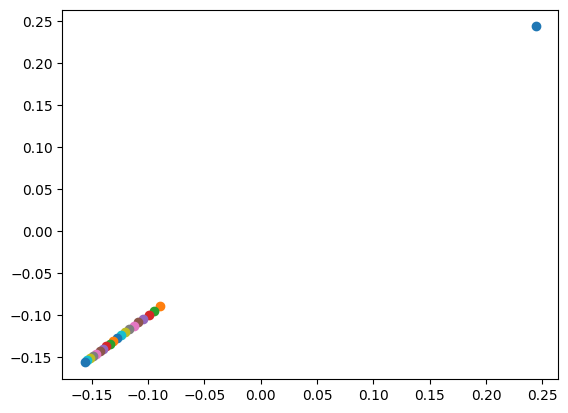

In [41]:
t,position = Planeta.GetPerihelio()
print(len(t),len(position))
t = np.array(t)
position = np.array(position)
print(t)


[3.13781819 0.06084314 0.05318471 0.03191457 0.02937185 0.02762951
 0.02787979 0.02277742 0.01983857 0.02843757 0.02232205 0.02620114
 0.01588897 0.02460964 0.02533239 0.02430079 0.0227967  0.02561265
 0.02096245 0.01256304 0.02116397]


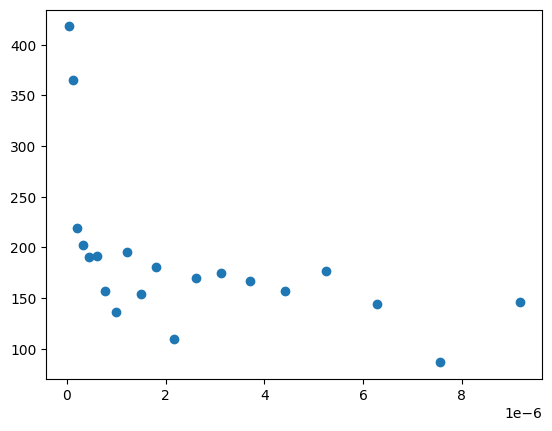

In [46]:
angles = []

for r in position:

    rUnitary = r/np.linalg.norm(r)
    unitaryVector =np.zeros(3)
    unitaryVector[0]=-1
    angles.append(np.arccos(np.dot(unitaryVector,rUnitary)))

angles = np.array(angles)
print(angles)

angles = angles*60*180*2/np.pi
t = t/100

plt.scatter(t[1:],angles[1:])
    
    
    

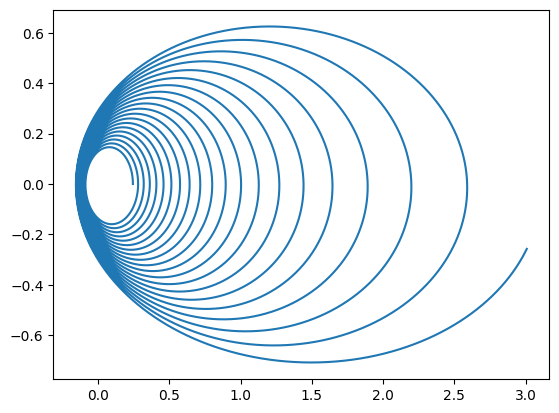

In [43]:
Mx = Mercurio.GetPosition(scale)[:,0]
My = Mercurio.GetPosition(scale)[:,1]
plt.plot(Mx,My)


[ 2.25670583e+02 -1.48208617e+07]


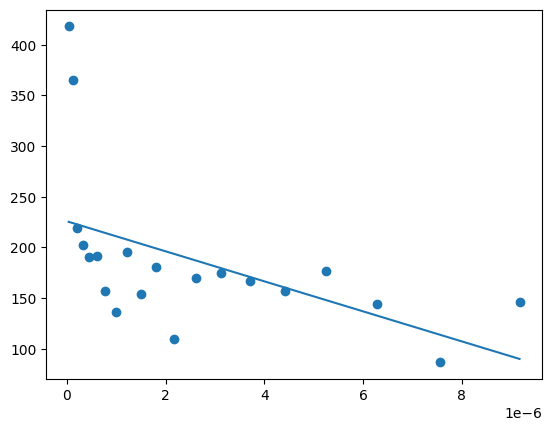

In [47]:
def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)
    
    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y



param = GetFit(t[1:],angles[1:])
print(param)

regresion = GetModel(t[1:],param)

plt.plot(t[1:], regresion)
plt.scatter(t[1:],angles[1:])
    